# **Q2: Kernel PCA** (30 Marks)

_Background content related to this question can be found in Sections 12.1.4 and 12.3 of Bishop's book._
## **KPCA Section 1: Theory (Eigen vectors of the kernel and the feature covariance)**
###  Question 2.1 [5 Marks]

Given d-dimensional input data $\{\mathbf{x}_i \in  \mathbb{R}^d, i=1,\ldots,N \}$. 
Define input matrix $\mathbf{X}=[\mathbf{x}_1^\top;\ldots;\mathbf{x}_N^\top]$ with $\mathbf{X} \in \mathbb{R}^{N \times d}$, here semicolon means concatenating rows to form a matrix. 
Define non-linear feature function $\phi: \mathbb{R}^{d} \to \mathbb{R}^{k}$, where $\phi(\mathbf{x}_i) \in  \mathbb{R}^{k}$ is the feature map for the _i_-th input data. Feature matrix $\mathbf{\Phi} \in \mathbb{R}^{N \times k}$ is defined as $\mathbf{\Phi}=[\phi(\mathbf{x}_1)^\top;\ldots;\phi(\mathbf{x}_N)^\top]$.

Let's assume that feature vectors $\mathbf{\Phi}$ are centered. Denote its covariance matrix as $\tilde C = \mathbf{\Phi}^\top \mathbf{\Phi}$. From Chapter 6 and 7 we also know that the kernel matrix can be defined as $\mathbf{K} = \mathbf{\Phi} \mathbf{\Phi}^\top$. 

Take a non-zero eigen value of $\mathbf{K}$, denote it as $\lambda_j$, with the corresonding eigen vector $\mathbf{v}_j$ normalised to unit length, i.e. $\mathbf{v}_j^\top \mathbf{v}_j=1$. 

Show that there exists an eigen vector $\mathbf{u}_j$ such that $\tilde C\mathbf{u}_j = \lambda_j \mathbf{u}_j$, with the property that $\|\mathbf{u}_j\|^2 = \lambda_j$.



**Solution:**


{Type your solution here}

We have $\mathbf{K} = \mathbf{\Phi} \mathbf{\Phi}^\top$, $\tilde C = \mathbf{\Phi}^\top \mathbf{\Phi}$. with $\mathbf{X} \in \mathbb{R}^{N \times d}$, 
 $\mathbf{\Phi} \in \mathbb{R}^{N \times d}$, $\mathbf{K} \in \mathbb{R}^{N \times N}$ ,$\tilde C \in \mathbb{R}^{d \times d}$ :

$$
\mathbf{K}\lambda_j=\lambda_j\mathbf{v}_j \\
\Rightarrow \mathbf{\Phi} \mathbf{\Phi}^\top\lambda_j=\lambda_j\mathbf{v}_j \\
\Rightarrow \mathbf{\Phi}^\top\mathbf{\Phi} \mathbf{\Phi}^\top\lambda_j=\lambda_j\mathbf{\Phi}^\top\mathbf{v}_j\\
\Rightarrow \tilde C \mathbf{\Phi}^\top\lambda_j=\lambda_j\mathbf{\Phi}^\top\mathbf{v}_j\\
$$
$$
\text{Thus, we could treat $\mathbf{\Phi}^\top\mathbf{v}_j$ as $\mathbf{u}_j$.}\\
\text{Since $\mathbf{K}$ is symmetric, we could apply the eigenvalue decomposition to it,}\\ 
\text{i.e., $\mathbf{K}=\mathbf{V}\mathbf{\Lambda}\mathbf{V}^\top$, where $\mathbf{V}=[\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3, ..., \mathbf{v}_d]$ is orthonormal and $\mathbf{\Lambda}=diag(\mathbf{\lambda}_1,\mathbf{\lambda}_2,\mathbf{\lambda}_3,...,\mathbf{\lambda}_d)$ is diagonal.} \\
\Rightarrow \|\mathbf{u}_j\|^2 = \mathbf{v}_j^\top\mathbf{\Phi}\mathbf{\Phi}^\top\mathbf{v}_j = \mathbf{v}_j^\top\mathbf{K}\mathbf{v}_j = \mathbf{v}_j^\top\mathbf{V}\mathbf{\Lambda}\mathbf{V}^\top\mathbf{v}_j \text{, and $\mathbf{v}_j$ is a column of $\mathbf{V}$.} \\
\Rightarrow \|\mathbf{u}_j\|^2 = \mathbf{\lambda}_1\mathbf{v}_j^\top\mathbf{v}_1\mathbf{v}_1^\top\mathbf{v}_j + \mathbf{\lambda}_2\mathbf{v}_j^\top\mathbf{v}_2\mathbf{v}_2^\top\mathbf{v}_j + ... + \mathbf{\lambda}_d\mathbf{v}_j^\top\mathbf{v}_d\mathbf{v}_d^\top\mathbf{v}_j   
$$ 

$$
\because \mathbf{V}=[\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3, ..., \mathbf{v}_d] \text{ is orthonormal,}\\
\therefore \mathbf{v}_j^\top\mathbf{v}_i = 
\begin{cases}  
1 & i = j \\
0 & i \neq j \\
\end{cases}
$$

$$
\Rightarrow \|\mathbf{u}_j\|^2 = \mathbf{\lambda}_1\mathbf{v}_j^\top\mathbf{v}_1\mathbf{v}_1^\top\mathbf{v}_j + \mathbf{\lambda}_2\mathbf{v}_j^\top\mathbf{v}_2\mathbf{v}_2^\top\mathbf{v}_j + ... + \mathbf{\lambda}_d\mathbf{v}_j^\top\mathbf{v}_d\mathbf{v}_d^\top\mathbf{v}_j  \\
= 0 + 0 + ... + 1 * \mathbf{\lambda}_j + ... +0 = \mathbf{\lambda}_j
$$

So, there exists an eigen vector $\mathbf{u}_j$ such that $\tilde C\mathbf{u}_j = \lambda_j \mathbf{u}_j$, with the property that $\|\mathbf{u}_j\|^2 = \lambda_j$.



## **KPCA Section 2: Programming**
#### **Notes**: Do **NOT** change function names and parameters where you are told to fill in.
In this section, we will implement kernel PCA to transform the data and consider the concentric ring dataset as an example. The concentric ring dataset in $\mathbb{R}^2$ consists of $N$ datapoints with three different labels (red, blue, and green). We define an input matrix $\mathbf{X}=[\mathbf{x}_1^\top;\ldots;\mathbf{x}_N^\top]$ with $\mathbf{X} \in \mathbb{R}^{N \times 2}$ and $\mathbf{y}\in \mathbb{R}^N$ as a vector containing labels.  

 The code below visualises the dataset. 

(You are not allowed to import other modules except defined below)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# This function is to visualise the data (Please do not change) 
def plot_data(X, y):
  plt.figure()
  plt.subplot(1, 1, 1 )
    
  reds = y == 0
  blues = y == 1
  green = y == 2

  plt.scatter(X[reds, 0], X[reds, 1], c="red",
              s=20, edgecolor='k')
  plt.scatter(X[blues, 0], X[blues, 1], c="blue",
              s=20, edgecolor='k')
  plt.scatter(X[green, 0], X[green, 1], c="green",
              s=20, edgecolor='k')
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")

  plt.show()

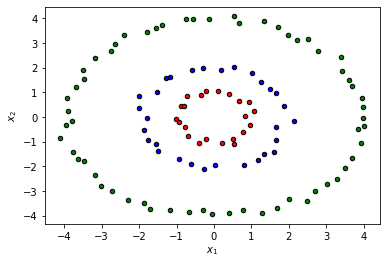

In [3]:
# This function is create the concentric ring data (Please do not change)
def make_circles(n_samples=100, factor=2):
    n_samples_out = n_samples // 8
    n_samples_in2 = n_samples // 3
    n_samples_in = n_samples // 6

    generator = np.random.RandomState(100)
    linspace_out = np.linspace(0, 2 * np.pi, n_samples_out, endpoint=False)
    linspace_in = np.linspace(0, 2 * np.pi, n_samples_in, endpoint=False)
    linspace_in2 = np.linspace(0, 2 * np.pi, n_samples_in2, endpoint=False)
    red_circ_x = np.cos(linspace_out)
    red_circ_y = np.sin(linspace_out)
    blue_circ_x = np.cos(linspace_in) * factor
    blue_circ_y = np.sin(linspace_in) * factor
    green_circ_x = np.cos(linspace_in2) * factor*2
    green_circ_y = np.sin(linspace_in2) * factor*2

    X = np.vstack([np.append(np.append(red_circ_x, blue_circ_x), green_circ_x),
                   np.append(np.append(red_circ_y, blue_circ_y), green_circ_y)]).T
    y = np.hstack([np.zeros(n_samples_out, dtype=np.intp),
                   np.ones(n_samples_in, dtype=np.intp), np.ones(n_samples_in2, dtype=np.intp)*2])

    X += generator.normal(scale=0.1, size=X.shape)

    return np.array(X), np.array(y)

# X is the input matrix (N x d) and y is the label (red/blue/green)
X, y = make_circles(n_samples=180)
plot_data(X, y)


Notice that this dataset is not linearly separable. We can consider the kernel method to make the dataset to be linearly separable.
We try to transform the ring dataset to be linearly separable using kernel PCA. We define the basis function $\phi: \mathbb{R}^2 \to \mathbb{R}^k$ to transform an input vector $\mathbf{x}_i$, and denote a matrix of features as $\mathbf{\Phi}=[\phi(\mathbf{x}_1)^\top;\ldots;\phi(\mathbf{x}_N)^\top]$. Here the kernel function is defined $\mathbb{k}(\mathbf{x}_i,\mathbf{x}_j) = \phi(\mathbf{x}_i)^\top \phi(\mathbf{x}_j)$.
In these questions, we employ polynomial and radial basis functions as kernel functions.
 

### Question 2.2 [ 5 Marks]

Consider a 3rd-order polynomial kernel function:
$$\mathbb{k}(\mathbf{x}_i,\mathbf{x}_j) = (\mathbf{x}_i^\top \mathbf{x}_j + 3)^3.$$

Find the basis function $\phi$ for this kernel (See Bishop Sec 6.2), show your workings.
What is the feature dimensionality $k$ after mapping with the basis function?

**Solution:**


{Type your solution here}
$$\mathbb{k}(\mathbf{x}_i,\mathbf{x}_j) = (\mathbf{x}_i^\top \mathbf{x}_j + 3)^3 
= (\sum_{k=1}^N \mathbf{x}_{ik}\mathbf{x}_{jk}+3)^3 \text{ where $N$ is the dimension of the original data.}  $$

$$ = (\sum_{k=1}^N \mathbf{x}_{ik} \mathbf{x}_{jk})^3 + 9(\sum_{k=1}^N \mathbf{x}_{ik} \mathbf{x}_{jk})^2 
+ 27\sum_{k=1}^N \mathbf{x}_{ik} \mathbf{x}_{jk} + 27$$  

In this problem, we have known that $N = 2$, so the equation could be rewrited into :

$$\mathbb{k}(\mathbf{x}_i,\mathbf{x}_j) = (\mathbf{x}_{i1} \mathbf{x}_{j1} + \mathbf{x}_{i2} \mathbf{x}_{j2})^3
+ 9(\mathbf{x}_{i1} \mathbf{x}_{j1} + \mathbf{x}_{i2} \mathbf{x}_{j2})^2 + 
27(\mathbf{x}_{i1} \mathbf{x}_{j1} + \mathbf{x}_{i2} \mathbf{x}_{j2}) + 27$$  

$$ = ((\mathbf{x}_{i1} \mathbf{x}_{j1})^3 + 3(\mathbf{x}_{i1} \mathbf{x}_{j1})^2(\mathbf{x}_{i2}\mathbf{x}_{j2}) 
+ 3(\mathbf{x}_{i1} \mathbf{x}_{j1})(\mathbf{x}_{i2}\mathbf{x}_{j2})^2 
+(\mathbf{x}_{i2} \mathbf{x}_{j2})^3)
+ 9((\mathbf{x}_{i1} \mathbf{x}_{j1})^2 + 2(\mathbf{x}_{i1} \mathbf{x}_{j1})(\mathbf{x}_{i2} \mathbf{x}_{j2}) +(\mathbf{x}_{i2} \mathbf{x}_{j2})^2) 
+ 27(\mathbf{x}_{i1} \mathbf{x}_{j1} + \mathbf{x}_{i2} \mathbf{x}_{j2}) + 27$$  

$$ = \mathbf{x}_{i1}^3\mathbf{x}_{j1}^3+ 3\mathbf{x}_{i1}^2\mathbf{x}_{i2}\mathbf{x}_{j1}^2\mathbf{x}_{j2} 
+ 3\mathbf{x}_{i1}\mathbf{x}_{i2}^2\mathbf{x}_{j1}\mathbf{x}_{j2}^2 +\mathbf{x}_{i2}^3\mathbf{x}_{j2}^3
+ 9\mathbf{x}_{i1}^2 \mathbf{x}_{j1}^2 + 18\mathbf{x}_{i1}\mathbf{x}_{i2}\mathbf{x}_{j1}\mathbf{x}_{j2} + 9\mathbf{x}_{i2}^2\mathbf{x}_{j2}^2  
+ 27\mathbf{x}_{i1}\mathbf{x}_{j1} + 27\mathbf{x}_{i2}\mathbf{x}_{j2} + 27$$  

$$
=(\mathbf{x}_{i1}^3, \sqrt{3}\mathbf{x}_{i1}^2\mathbf{x}_{i2}, \sqrt{3}\mathbf{x}_{i1}\mathbf{x}_{i2}^2, \mathbf{x}_{i2}^3, 3\mathbf{x}_{i1}^2,  
 3\sqrt{2}\mathbf{x}_{i1}\mathbf{x}_{i2}, 3\mathbf{x}_{i2}^2, 3\sqrt{3}\mathbf{x}_{i1}, 3\sqrt{3}\mathbf{x}_{i2}, 3\sqrt{3})\\
 (\mathbf{x}_{j1}^3, \sqrt{3}\mathbf{x}_{j1}^2\mathbf{x}_{j2}, \sqrt{3}\mathbf{x}_{j1}\mathbf{x}_{j2}^2, \mathbf{x}_{j2}^3, 3\mathbf{x}_{j1}^2,  
 3\sqrt{2}\mathbf{x}_{j1}\mathbf{x}_{j2}, 3\mathbf{x}_{j2}^2, 3\sqrt{3}\mathbf{x}_{j1}, 3\sqrt{3}\mathbf{x}_{j2}, 3\sqrt{3})^\top
$$

So, we could find that the basis function is :

$$
\phi(\mathbf{x})=(\mathbf{x}_{1}^3, \sqrt{3}\mathbf{x}_{1}^2\mathbf{x}_{2}, \sqrt{3}\mathbf{x}_{1}\mathbf{x}_{2}^2, \mathbf{x}_{2}^3, 3\mathbf{x}_{1}^2,  
 3\sqrt{2}\mathbf{x}_{1}\mathbf{x}_{2}, 3\mathbf{x}_{2}^2, 3\sqrt{3}\mathbf{x}_{1}, 3\sqrt{3}\mathbf{x}_{2}, 3\sqrt{3})^\top
$$

And the feature dimensionality  𝑘  after mapping with the basis function is 10.

### Question 2.3 [10 Marks]

As we know that there are a kernel matrix and a covariance matrix. Below, we implement kernel PCA by computing the kernel matrix with the basis function $\phi$ and the kernel function $\mathbb{k}(\mathbf{x_i},\mathbf{x}_j)$ using the polynomial function in Question 2.2. Afterwards, the data is projected using PCA. 
<br/>
**Solution:**



In [4]:
# Solution: code for computing the kernel matrix using the basis function 
def polynomial_basis_transformation(X):
    # Input: An input matrix N x 2
    # Output: A kernel matrix 
    # Transform the input X and apply the basis function phi 
    ####  TODO {Type your solution here} ###
    N = X.shape[0]
    phi_matrix = np.zeros((N,10))
    for i in range(N):
        x1 = X[i, 0]
        x2 = X[i, 1]
        phi_matrix[i,:] = np.array([x1**3, x2**3, 27**0.5, (3**0.5)*(x1**2)*x2, (3**0.5)*x1*(x2**2),3*x1**2, 3*x2**2, 
                               27**0.5*x1, 27**0.5*x2, 18**0.5*x1*x2])
    kernel_matrix = phi_matrix@phi_matrix.T
    # Doing Centering
    Ones_N =  np.ones((N,N))/N
    kernel_bar = kernel_matrix - Ones_N@kernel_matrix - kernel_matrix@Ones_N + Ones_N@kernel_matrix@Ones_N # by 12.85 in Bishop
    return  kernel_bar

In [5]:
# Solution: code for computing the kernel matrix using the kernel function 
def polynomial_kernel(X):
    # Input: An input matrix N x 2
    # Output: A kernel matrix 
    # Compute the kernel function to X
    ####  TODO {Type your solution here} ###
    N = X.shape[0]
    kernel_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            kernel_matrix[i,j] = (X[i,:].reshape(1,-1) @ X[j,:].reshape(-1,1) + 3)**3
    # Doing Centering
    Ones_N =  np.ones((N,N))/N
    kernel_bar = kernel_matrix - Ones_N@kernel_matrix - kernel_matrix@Ones_N + Ones_N@kernel_matrix@Ones_N # by 12.85 in Bishop
    return  kernel_bar

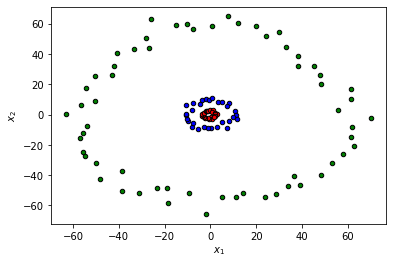

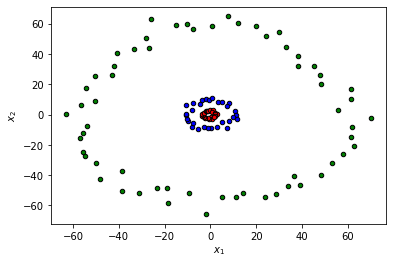

In [6]:
# Solution to data projection 
def pca_projection(X, func):
    # Your answer: Calculating the kernel matrix 
    # Output: The projected points in R^2
    ####  TODO {Type your solution here} ###
    
    kernel = func(X) 
    
    lamdas, vec_u = np.linalg.eigh(kernel) # Using np.linalg.eigh to eliminate complex numbers
    surviving_index = np.argsort(-lamdas)[:2]
    surviving_lamdas = lamdas[surviving_index]
    surviving_u = vec_u[:, surviving_index] * (1/np.sqrt(surviving_lamdas)) # doing normalization
    projection = (surviving_u.T @ kernel).T
    return projection

# Please do NOT change the code below
# Calculate the projection with parameters: an input matrix and a function 
projected_X_poly_kernel = pca_projection(X, polynomial_kernel)
plot_data(projected_X_poly_kernel, y)

# Calculate the projection with parameters: an input matrix and a function
projected_X_poly_basis = pca_projection(X, polynomial_basis_transformation)
plot_data(projected_X_poly_basis, y)


In Question 2.4 and 2.5, we consider to use the Radial Basis Function (RBF) kernel. We define the kernel function as:
  $$\mathbb{k}(\mathbf{x}_i,\mathbf{x}_j)=\mathrm{exp}(-\gamma \|\mathbf{x}_i-\mathbf{x}_j\|^2),$$ where $\gamma$ is a parameter to control the radius of the kernel. The result of the projected data is highly dependent on the value of $\gamma$.

### Question 2.4 [5 Marks]
Try to implement (similar in Question 2.3) data projection using kernel PCA from an input matrix $\mathbf{X}$ but now the kernel function is RBF. In this question, we set $\gamma=10$. 


**Solution:**

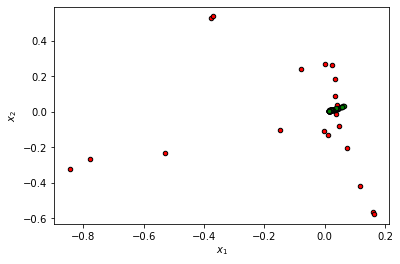

In [7]:
# Solution to data projection 
def projection_rbf_kpca(X, gamma):
    # Your answer: Implement and compute the kernel matrix using RBF then projecting the data
    # Output: The projected points in R^2
    #### TODO {Type your solution here} ###
    kernel = RBF_Kernel(X, gamma) 
    
    lamdas, vec_u = np.linalg.eigh(kernel) # Using np.linalg.eigh to eliminate complex numbers
    surviving_index = np.argsort(-lamdas)[:2]
    surviving_lamdas = lamdas[surviving_index]
    surviving_u = vec_u[:, surviving_index] * (1/np.sqrt(surviving_lamdas)) # doing normalization
#     projection = (surviving_u.T @ kernel).T
    projection = (kernel @ surviving_u)
    return projection

def RBF_Kernel(X,gamma):
    N = X.shape[0]
    kernel_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            kernel_matrix[i,j] = np.exp(-gamma*(np.linalg.norm(X[i,:] - X[j,:])**2))
    # Doing Centering
    Ones_N =  np.ones((N,N))/N
    kernel_bar = kernel_matrix - Ones_N@kernel_matrix - kernel_matrix@Ones_N + Ones_N@kernel_matrix@Ones_N # by 12.85 in Bishop
    return  kernel_bar


# Please do NOT change the code below
# Calculate the projection with parameters: an input matrix and a function 
projected_X_rbf = projection_rbf_kpca(X, gamma=10)
plot_data(projected_X_rbf, y)

### Question 2.5 [5 Marks]
In Question 2.4, it is not clearly visible that the visualisation shows the projected data linearly separable. Try to find the value for $\gamma$, and the visualisation should **CLEARLY** shows that the projected data is linearly separable.


**Solution:**

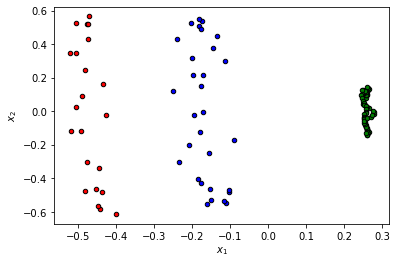

In [8]:
# Solution to find \gamma
# Set your gamma 
gamma = 0.5 #### TODO {Type your solution here} ### 

# Please do NOT change the code below
# Calculate the projection with parameters: an input matrix and gamma
projected_X_rbf = projection_rbf_kpca(X, gamma=gamma)
plot_data(projected_X_rbf, y)